In [2]:
import h5py
import glob

In [7]:
disp_file_name = glob.glob("/home/arun/experiments/maml/Eleven_tasks_FirstOrder_noScheduler/results_unseen/Motion/amount_05/patient095.h5")[0]

f = h5py.File(disp_file_name,'r')
f["reconstruction"].shape

(128, 128, 12, 6)

In [18]:
disp_file_name = glob.glob("/media/Data/MRI/datasets/artifact_suppression/Motion/03/valid_query/patient022.h5")[0]

f = h5py.File(disp_file_name,'r')
f["crp_inp"].shape

(128, 128, 5, 9)

In [19]:
48+30+36+48+42+(14*4)+70+15+18+(12*6)

435

In [15]:
disp_file_name,kk

('/home/arun/experiments/maml/Eleven_tasks_FirstOrder_noScheduler/results_valid/Motion/amount_03/patient082.h5',
 '/media/Data/MRI/datasets/artifact_suppression/Motion/03/valid_query/patient033.h5')

In [16]:
kk = glob.glob("/media/Data/MRI/datasets/artifact_suppression/Motion/03/valid_query/patient082.h5")[0]
g = h5py.File(kk,'r')
g["crp_inp"].shape

(128, 128, 14, 6)

In [1]:
str("ab" / "cd")

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [6]:
a = [1,2,3,4,2,4,1]
a.index(4)

3

In [21]:
import numpy as np
from skimage.filters import laplace
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

In [7]:
gt = np.random.rand(128,128,6,9)
pred = np.random.rand(128,128,6,9)

In [8]:
peak_signal_noise_ratio(gt, pred, data_range=gt.max())

7.781040087238899

In [9]:
np.mean((gt - pred) ** 2)

0.16668460731226312

In [10]:
np.linalg.norm(gt - pred) ** 2 / np.linalg.norm(gt) ** 2

0.4996759331104287

In [18]:
structural_similarity(gt,pred,multichannel=True, data_range=gt.max(),win_size = 5)

/tmp/ipykernel_1187103/1061801940.py:1: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  structural_similarity(gt,pred,multichannel=True, data_range=gt.max(),win_size = 5)


0.004987645875791523

In [27]:
def hfn(gt,pred):

    hfn_total = []

    for frame_no in range(gt.shape[3]):
        for slice_no in range(gt.shape[2]):
            gt_slice = gt[:,:,slice_no,frame_no]
            pred_slice = pred[:,:,slice_no,frame_no]

            pred_slice[pred_slice<0] = 0 #bring the range to 0 and 1.
            pred_slice[pred_slice>1] = 1

            gt_slice_laplace = laplace(gt_slice)        
            pred_slice_laplace = laplace(pred_slice)

            hfn_slice = np.sum((gt_slice_laplace - pred_slice_laplace) ** 2) / np.sum(gt_slice_laplace **2)
            hfn_total.append(hfn_slice)

    return np.mean(hfn_total)

In [32]:
hfn(gt,pred)

1.991404984554558

In [36]:
a = 5
a % 2

1

In [12]:
import numpy as np
a = [1,4,7]
b = 1
if b in a:
    print(a.index(b))

0


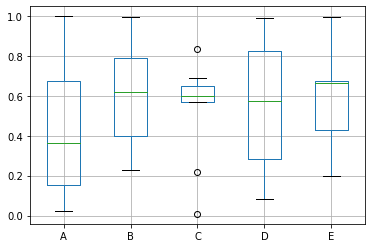

In [34]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
myFig = plt.figure()
# a = df.plot.box(grid='True')
a = df.boxplot()
myFig.savefig("dummy.png",format="png")

In [3]:
import pandas as pd
kk = ["a","b"]
ll = pd.DataFrame(columns = kk)
ll

,a,b


In [7]:
bp_df = pd.DataFrame()
metrics_dict = {"m/03":{"psnr":[10,20],"ssim":[30,40]},"s/02":{"psnr":[8,18],"ssim":[28,38]},"u/04":{"psnr":[6,16],"ssim":[26,36]}}
for one_task,one_task_metric_dict in metrics_dict.items():
    for metric_name,metric_value in one_task_metric_dict.items():
        bp_df[one_task+"/"+metric_name] = metric_value

In [15]:
metrics_names = ["PSNR","SSIM","mse","nmse","fname"]
kk = {ll:[] for ll in metrics_names}
kk

{'PSNR': [], 'SSIM': [], 'mse': [], 'nmse': [], 'fname': []}

In [16]:
metrics_names[0]

'PSNR'

In [18]:
with open("/home/arun/dummy/dummy.txt","w") as f:
    f.write(1)

FileNotFoundError: [Errno 2] No such file or directory: '/home/arun/dummy/dummy.txt'

In [5]:
kk = "Motion"
kk[0:2]

'Mo'

In [ ]:
"{}_dummy_{}".format(5,6)

In [1]:
kk = "1,2,3"
kk.split(",")[1]

'2'

In [2]:
kk = 'a'
kk.split(",")

['a']

In [1]:
import torch

In [2]:
path = "/home/arun/experiments/maml/MM_Curriculum_Nine_tasks_FirstOrder_noScheduler/best_model.pt"
torch.load(path)["args"]

Namespace(adapt_lr=0.001, checkpoint=None, data_parallel=False, degradation_names='MotionM/03,SpatialM/02,UndersamplingM/02,MotionM/05,SpatialM/03,UndersamplingM/04,MotionM/07,SpatialM/05,UndersamplingM/06', device='cuda:0', difficult_task_strings='MotionM/07,SpatialM/05,UndersamplingM/06', drop_prob=0.0, easy_task_strings='MotionM/03,SpatialM/02,UndersamplingM/02', exp_dir=PosixPath('/home/arun/experiments/maml/1_5_11_MM_Curriculum_Nine_tasks_FirstOrder_noScheduler'), lr_gamma=0.1, lr_step_size=40, medium_task_strings='MotionM/05,SpatialM/03,UndersamplingM/04', meta_lr=0.001, no_of_train_adaptation_steps=3, no_of_val_adaptation_steps=3, num_chans=32, num_epochs=200, num_pools=4, pacing_function=['1', '5', '11'], pacing_no_of_train_adaptation_steps=['1', '2', '3'], pacing_no_of_val_adaptation_steps=['1', '2', '3'], report_interval=1, resume=False, scored_task_strings=['MotionM/03,SpatialM/02,UndersamplingM/02', 'MotionM/03,SpatialM/02,UndersamplingM/02,MotionM/05,SpatialM/03,Undersampl